In [3]:
#Initialization
using Pkg
using LinearAlgebra
using OrdinaryDiffEq
using Plots
using StatsBase
theme(:dracula)

# Numerically Solving the 2-body Problem
----

## Scope: 
Here, we want to numerically integrate the two-body problem using orbital elements.

## Strategy:
 -We'll start by making a function that will get the initial conditions from the parameters. We'll be using the relative coordinates 
 
 -then a program that takes orbital elements and converts them to initial conditions to use in our integrator.

## Initial Values
In the relative coordinates, we can set 

In [4]:
Ma = 2.063
Mb = 1.018
e = 0.591412
a=7.4957
G=1
M = G*(Ma+Mb)
μ = Ma*Mb/M

function InitialValues(a,e,M,μ)
    x0 = a*(1-e)
    y0 = 0
    vx0 = 0
    vy0 = μ* √(G*M *a *(1-e^2))/x0
    return [x0,y0,vx0,vy0]
end

InitialValues (generic function with 1 method)

In [5]:
function coulomb!(dr,r,p,t)
    r,v = r[1:2],r[3:4]
    dr[1:2] = v #dr/dt = v
    dr[3:4] = -p[1]/norm(r)^3 * r 
end 

problem = ODEProblem(coulomb!,InitialValues(a,e,M,μ),(0,100),[M])#This defines our problem as a first order ODE 
euler = solve(problem, dt=1E-4,Euler())
rk4 = solve(problem, RK4())
#Now, as an interlude, we need to implemente a leapfrog scheme, as instructed in the problem. Our function there won't work, because the strategy was splitting our second order ODE into
#a system of first order ODEs. We will now define the function for the leap:
CoulombLeapy(dr,r,p,t) = -p[1]/norm(r)^3 * r[1:2]
problemleapy = SecondOrderODEProblem(CoulombLeapy,InitialValues(a,e,M,μ)[3:4],InitialValues(a,e,M,μ)[1:2],(0,100),[M])
Leapy = solve(problemleapy,dt=1E-3,VerletLeapfrog())
plot(euler,vars=(1,2),label="Euler")
plot!(rk4, vars=(1,2),label="Runge-Kutta 4")
plot!(Leapy,vars=(3,4),label="Leapy")

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


[ Info: Saved animation to c:\Users\batti\Documents\Uni\ComputationalProjects\Julia\AstroPhysics\tmp.gif


Plots.AnimatedGif("c:\\Users\\batti\\Documents\\Uni\\ComputationalProjects\\Julia\\AstroPhysics\\tmp.gif")
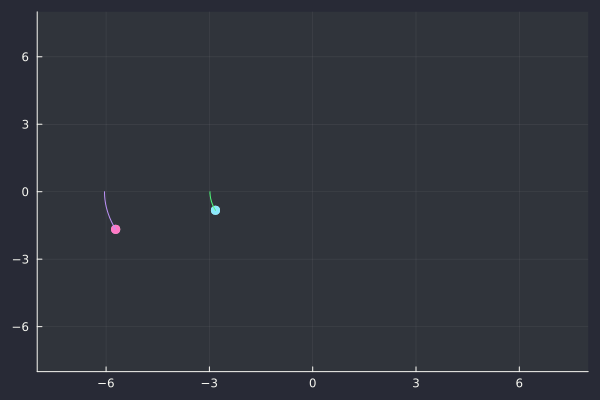

In [9]:
r = Leapy[3:4,:]
Ra = r/(1-(Ma/Mb)) 
Rb = Ra - r
trail = 1000
max=8
@gif for i ∈ trail+1:500:100000
    p = scatter(Ra[1,i:i+1],Ra[2,i:i+1],xlim=[-max,max],ylim=[-max,max],markerstrokewidth=0,markersize=5)
    q = scatter!(p,Rb[1,i:i+1],Rb[2,i:i+1],legend=false,markerstrokewidth=0,markersize=5)
    plot!(q,Ra[1,i-trail:i],Ra[2,i-trail:i])
    plot!(Rb[1,i-trail:i],Rb[2,i-trail:i])
end